In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches= pd.read_csv('atp_matches_till_2022.csv')
players= pd.read_csv('atp_players_till_2022.csv')
rankings= pd.read_csv('atp_rankings_till_2022.csv')

In [4]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [5]:
players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [6]:
rankings.head()

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [7]:
matches_info = matches.info()
players_info = players.info()
rankings_info = rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188161 non-null  object 
 1   tourney_name        188161 non-null  object 
 2   surface             185844 non-null  object 
 3   draw_size           188161 non-null  int64  
 4   tourney_level       188161 non-null  object 
 5   tourney_date        188161 non-null  int64  
 6   match_num           188161 non-null  int64  
 7   winner_id           188161 non-null  int64  
 8   winner_seed         69694 non-null   float64
 9   winner_entry        16270 non-null   object 
 10  winner_name         188161 non-null  object 
 11  winner_hand         188144 non-null  object 
 12  winner_ht           171924 non-null  float64
 13  winner_ioc          188151 non-null  object 
 14  winner_age          186826 non-null  float64
 15  loser_id            188161 non-nul

In [8]:
matches['tourney_date'] = pd.to_datetime(matches['tourney_date'], format='%Y%m%d')
rankings['ranking_date'] = pd.to_datetime(rankings['ranking_date'], format='%Y%m%d')

In [9]:
# Limpiar datos:
# 1. Eliminar filas con más de 40% de valores nulos en matches
threshold = int(0.6 * matches.shape[1])
matches_cleaned = matches.dropna(thresh=threshold)

# 2. Eliminar duplicados
matches_cleaned = matches_cleaned.drop_duplicates()
players_cleaned = players.drop_duplicates()
rankings_cleaned = rankings.drop_duplicates()

# 3. Reiniciar índices
matches_cleaned.reset_index(drop=True, inplace=True)
players_cleaned.reset_index(drop=True, inplace=True)
rankings_cleaned.reset_index(drop=True, inplace=True)

### EDA

#### EDA for matches

##### 1. General information

In [10]:
print("Resumen del dataset:")
print(matches_cleaned.info())
print("\nDescripción estadística:")
print(matches_cleaned.describe(include='all'))

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92243 entries, 0 to 92242
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          92243 non-null  object        
 1   tourney_name        92243 non-null  object        
 2   surface             92243 non-null  object        
 3   draw_size           92243 non-null  int64         
 4   tourney_level       92243 non-null  object        
 5   tourney_date        92243 non-null  datetime64[ns]
 6   match_num           92243 non-null  int64         
 7   winner_id           92243 non-null  int64         
 8   winner_seed         40715 non-null  float64       
 9   winner_entry        12260 non-null  object        
 10  winner_name         92243 non-null  object        
 11  winner_hand         92238 non-null  object        
 12  winner_ht           92009 non-null  float64       
 13  winner_ioc          92243

##### 2. Number of games per year

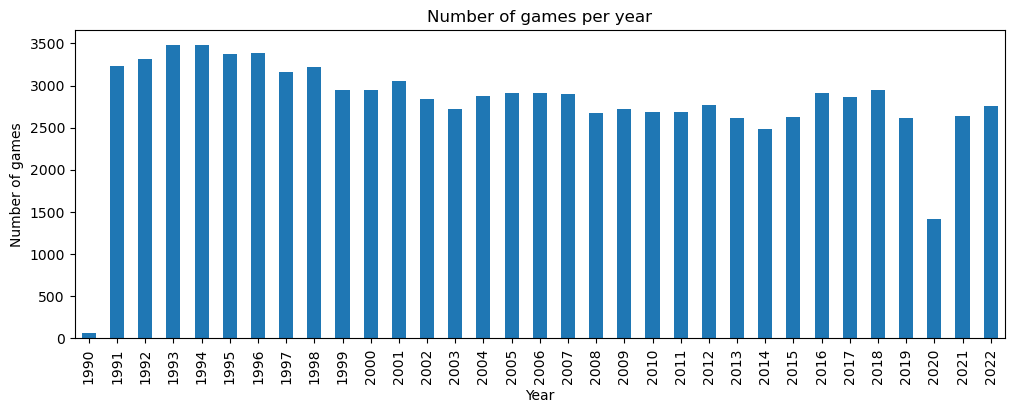

In [11]:
matches_cleaned['year'] = matches_cleaned['tourney_date'].dt.year
matches_per_year = matches_cleaned['year'].value_counts().sort_index()
matches_per_year.plot(kind='bar', figsize=(12, 4), title='Number of games per year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

##### 3. Distribution of surfaces

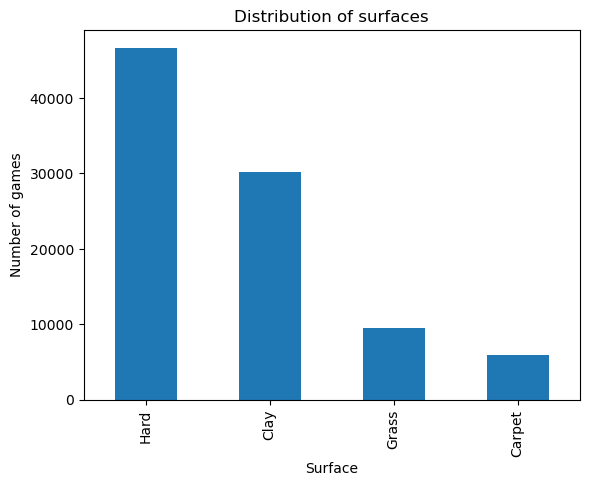

In [12]:
surface_counts = matches_cleaned['surface'].value_counts()
surface_counts.plot(kind='bar', title='Distribution of surfaces')
plt.xlabel('Surface')
plt.ylabel('Number of games')
plt.show()

##### 4. Most Frequent Winners

In [13]:
top_winners = matches_cleaned['winner_id'].value_counts().head(10)
print("\nTop 10 players with most wins:")
print(top_winners)


Top 10 players with most wins:
winner_id
103819    1195
104745    1043
104925    1000
103970     707
104918     689
101736     650
101948     631
104607     607
104053     576
104755     576
Name: count, dtype: int64


In [14]:
players_cleaned[players_cleaned['player_id'] == 103819]

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
3818,103819,Roger,Federer,R,19810808.0,SUI,185.0,Q1426


In [15]:
players_cleaned[players_cleaned['name_last'].str.lower() == 'nadal']


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
4741,104745,Rafael,Nadal,L,19860603.0,ESP,185.0,Q10132
35136,135152,Jorge,Nadal,U,19920811.0,ESP,NaN,NaN


In [16]:
# Count how many times each player_id appears
player_id_counts = players_cleaned['player_id'].value_counts()

# Filter player_ids that appear more than once
duplicate_ids = player_id_counts[player_id_counts > 1].index

# Show sample of these duplicates
duplicate_players = players_cleaned[players_cleaned['player_id'].isin(duplicate_ids)]
print(f"Number of duplicated player_ids: {len(duplicate_ids)}")
duplicate_players.sort_values('player_id').head(20)


Number of duplicated player_ids: 0


,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id


##### 5. Winner Aces Distribution

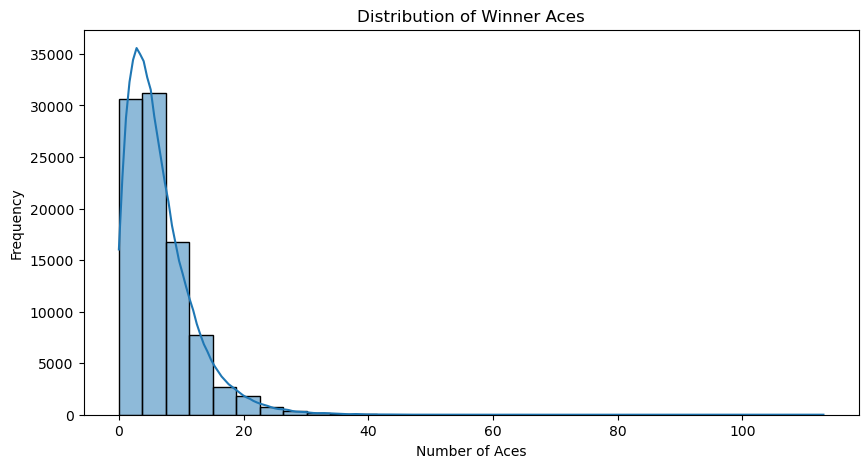

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(matches_cleaned['w_ace'].dropna(), bins=30, kde=True)
plt.title('Distribution of Winner Aces')
plt.xlabel('Number of Aces')
plt.ylabel('Frequency')
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [20]:
# Shape & missingness in key stats
print("Shape:", matches.shape)

# Missingness in key stats
stat_cols = ['w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon',
             'w_SvGms','w_bpSaved','w_bpFaced',
             'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon',
             'l_SvGms','l_bpSaved','l_bpFaced']
miss = matches[stat_cols].isna().mean().sort_values(ascending=False)
print("\n% missing in each stat:")
print((miss*100).round(1))

Shape: (188161, 49)

% missing in each stat:
l_ace        51.0
w_bpFaced    51.0
l_bpSaved    51.0
l_2ndWon     51.0
l_1stWon     51.0
l_1stIn      51.0
l_svpt       51.0
w_df         51.0
l_bpFaced    51.0
w_bpSaved    51.0
w_2ndWon     51.0
w_1stWon     51.0
w_1stIn      51.0
w_svpt       51.0
l_df         51.0
w_SvGms      51.0
l_SvGms      51.0
w_ace        51.0
dtype: float64


In [21]:
display(matches[stat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
w_ace,92220.0,6.517708,5.341289,0.0,3.0,5.0,9.0,113.0
w_df,92219.0,2.736258,2.367377,0.0,1.0,2.0,4.0,26.0
w_svpt,92219.0,78.068142,29.523162,0.0,56.0,73.0,94.0,491.0
w_1stIn,92219.0,47.581724,19.216689,0.0,34.0,44.0,58.0,361.0
w_1stWon,92219.0,35.873746,13.836610,0.0,26.0,33.0,43.0,292.0
w_2ndWon,92219.0,16.733883,6.989782,0.0,12.0,16.0,21.0,82.0
w_SvGms,92220.0,12.396758,4.120292,0.0,9.0,11.0,15.0,90.0
w_bpSaved,92219.0,3.527549,3.086390,0.0,1.0,3.0,5.0,24.0
w_bpFaced,92219.0,5.167406,4.063021,0.0,2.0,4.0,7.0,34.0
l_ace,92219.0,4.828745,4.670710,0.0,2.0,4.0,7.0,103.0


In [22]:
# Compute winner–loser diffs
diffs = {}
for stat in ['ace','df','svpt','1stIn','1stWon','2ndWon','SvGms','bpSaved','bpFaced']:
    diffs[f'{stat}_diff'] = matches[f'w_{stat}'] - matches[f'l_{stat}']

diff_df = pd.DataFrame(diffs)
matches = pd.concat([matches, diff_df], axis=1)

# Quick check
display(matches[list(diffs.keys())].describe().T)

,count,mean,std,min,25%,50%,75%,max
ace_diff,92219.0,1.688979,5.877980,-65.0,-1.0,1.0,5.0,57.0
df_diff,92219.0,-0.751884,3.053940,-24.0,-3.0,-1.0,1.0,22.0
svpt_diff,92219.0,-2.840141,13.555749,-77.0,-11.0,-3.0,6.0,141.0
1stIn_diff,92219.0,-0.429825,11.704071,-66.0,-8.0,0.0,7.0,83.0
1stWon_diff,92219.0,3.978855,7.464773,-41.0,-1.0,4.0,9.0,54.0
2ndWon_diff,92219.0,1.748620,6.019871,-31.0,-2.0,2.0,6.0,34.0
SvGms_diff,92220.0,0.199371,0.724205,-8.0,0.0,0.0,1.0,19.0
bpSaved_diff,92219.0,-1.284453,4.007283,-24.0,-4.0,-1.0,1.0,24.0
bpFaced_diff,92219.0,-3.575478,4.534002,-27.0,-6.0,-4.0,-1.0,25.0


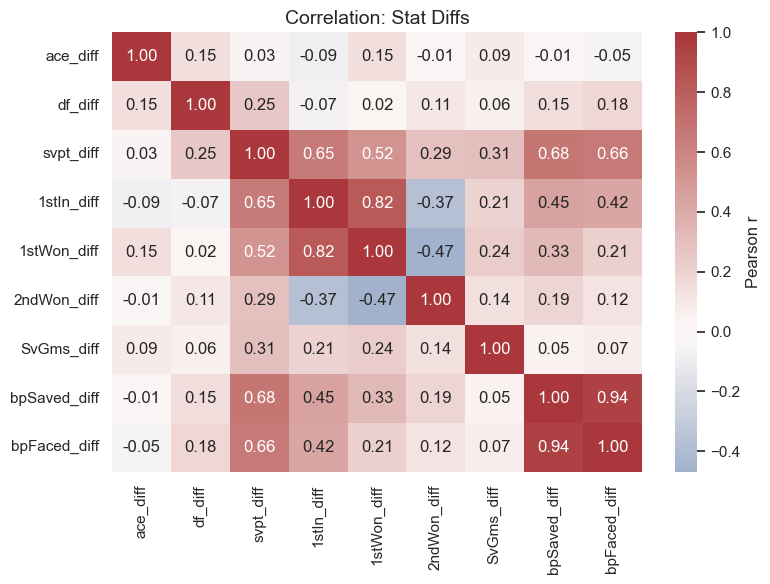

In [24]:
corr = matches[list(diffs.keys())].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="vlag", center=0,
    cbar_kws={'label':'Pearson r'}
)
plt.title("Correlation: Stat Diffs", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/pk/nsm_zgpj52lgfm4fgt44_t8c0000gn/T/ipykernel_91674/1900088763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_corr.values, y=feat_corr.index, palette="mako")


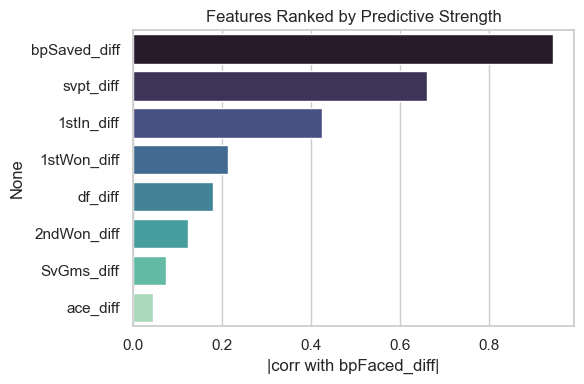

In [26]:
# Use 'bpFaced_diff' as the target for correlation ranking
target = 'bpFaced_diff'
feat_corr = corr[target].drop(target).abs().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_corr.values, y=feat_corr.index, palette="mako")
plt.xlabel(f"|corr with {target}|")
plt.title("Features Ranked by Predictive Strength")
plt.tight_layout()
plt.show()

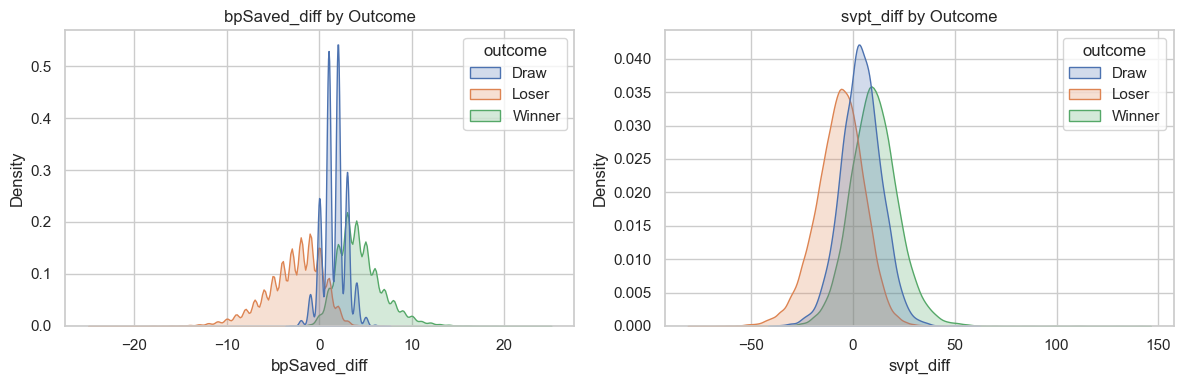

In [28]:
# Create a categorical outcome column based on the sign of the target
matches['outcome'] = matches[target].apply(lambda x: 'Winner' if x > 0 else ('Loser' if x < 0 else 'Draw'))

top2 = feat_corr.index[:2].tolist()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
for ax, col in zip(axes, top2):
    sns.kdeplot(data=matches, x=col, hue='outcome',
                fill=True, common_norm=False, ax=ax)
    ax.set_title(f"{col} by Outcome")
plt.tight_layout(); plt.show()